<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
CROP YIELD ANALYSIS AND PREDICTION</h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Crop yield prediction plays a crucial role in agriculture and food <br>
production. Farmers, policymakers, and agricultural researchers need accurate <br>
predictions of crop yields to make informed decisions</h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Libraries</h>

In [58]:
import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [64]:
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor


In [13]:
df_yield = pd.read_csv('yield_df.csv')
df_yield.shape

(28242, 8)

In [14]:
df_yield.head(2)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [15]:
df_yield.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Removing unnecessary columnsform the data set</h1>

In [16]:
df_yield = df_yield.drop(['Unnamed: 0',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Albania,Maize,1990,36613
1,Albania,Potatoes,1990,66667
2,Albania,"Rice, paddy",1990,23333
3,Albania,Sorghum,1990,12500
4,Albania,Soybeans,1990,7000


In [17]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         28242 non-null  object
 1   Item         28242 non-null  object
 2   Year         28242 non-null  int64 
 3   hg/ha_yield  28242 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 882.7+ KB


####mmm

In [18]:
df_yield.describe()

,Year,hg/ha_yield
count,28242.000000,28242.000000
mean,2001.544296,77053.332094
std,7.051905,84956.612897
min,1990.000000,50.000000
25%,1995.000000,19919.250000
50%,2001.000000,38295.000000
75%,2008.000000,104676.750000
max,2013.000000,501412.000000


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
we need the rainfall rate for the year , Pesticides,Average Temprature and this data we have to merge with the yield data set</h1>

In [19]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [20]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Convert to object to float values of average rain fall mmper year</h1>

In [21]:
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [22]:
df_rain.isna().sum()

 Area                              0
Year                               0
average_rain_fall_mm_per_year    780
dtype: int64

In [23]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,6727.000000,5947.000000
mean,2001.354839,1124.743232
std,9.530114,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [24]:
df_rain = df_rain.dropna()

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">we are getting error while merging data due to names are different in Area name in both rain and yield data set so we hgave to correct it.</h1>

In [25]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

In [26]:
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [27]:
yield_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Albania,Maize,1990,36613,1485.0
1,Albania,Potatoes,1990,66667,1485.0
2,Albania,"Rice, paddy",1990,23333,1485.0
3,Albania,Sorghum,1990,12500,1485.0
4,Albania,Soybeans,1990,7000,1485.0
...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0
28238,Zimbabwe,Sorghum,2013,3066,657.0
28239,Zimbabwe,Soybeans,2013,13142,657.0
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0


In [28]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
dtype: int64

In [29]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,28242.000000,28242.000000,28242.00000
mean,2001.544296,77053.332094,1149.05598
std,7.051905,84956.612897,709.81215
min,1990.000000,50.000000,51.00000
25%,1995.000000,19919.250000,593.00000
50%,2001.000000,38295.000000,1083.00000
75%,2008.000000,104676.750000,1668.00000
max,2013.000000,501412.000000,3240.00000


Pesticides Data:

In [30]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [31]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [32]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [33]:
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(28242, 6)

In [24]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


In [34]:
yield_df.dropna()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.00
1,Albania,Potatoes,1990,66667,1485.0,121.00
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00
3,Albania,Sorghum,1990,12500,1485.0,121.00
4,Albania,Soybeans,1990,7000,1485.0,121.00
...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07


In [35]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
dtype: int64

Average Temprature:

In [36]:
avg_temp=  pd.read_csv('temp.csv')

In [37]:
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [38]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [39]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [40]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [42]:
yield_df.shape

(186094, 7)

In [43]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,186094.000000,186094.000000,186094.000000,186094.000000,186094.000000
mean,2001.462605,80332.936425,1142.587096,58963.395172,22.996121
std,7.063155,89403.065039,525.943513,68504.571020,5.072132
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19125.000000,758.000000,27422.770000,20.310000
50%,2001.000000,31874.000000,1083.000000,44957.520000,25.360000
75%,2008.000000,113463.000000,1083.000000,61732.110000,26.400000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [35]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


## we prepared a data set avaialble with all labels from other data sets 
## Know we have to apply Data exploration

In [36]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,17455,17455,17455,17455,17455,17455
Maize,24683,24683,24683,24683,24683,24683
Plantains and others,786,786,786,786,786,786
Potatoes,25298,25298,25298,25298,25298,25298
"Rice, paddy",23030,23030,23030,23030,23030,23030
Sorghum,21041,21041,21041,21041,21041,21041
Soybeans,23557,23557,23557,23557,23557,23557
Sweet potatoes,21938,21938,21938,21938,21938,21938
Wheat,24143,24143,24143,24143,24143,24143


In [44]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,186094.000000,186094.000000,186094.000000,186094.000000,186094.000000
mean,2001.462605,80332.936425,1142.587096,58963.395172,22.996121
std,7.063155,89403.065039,525.943513,68504.571020,5.072132
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19125.000000,758.000000,27422.770000,20.310000
50%,2001.000000,31874.000000,1083.000000,44957.520000,25.360000
75%,2008.000000,113463.000000,1083.000000,61732.110000,26.400000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [45]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             7203247128
Brazil            1843053366
Mexico            1046308224
Japan              746825472
Pakistan           665076906
Australia          654666372
Indonesia          415161036
United Kingdom     277099950
Turkey             261319750
Canada             208241532
Name: hg/ha_yield, dtype: int64

<Axes: >

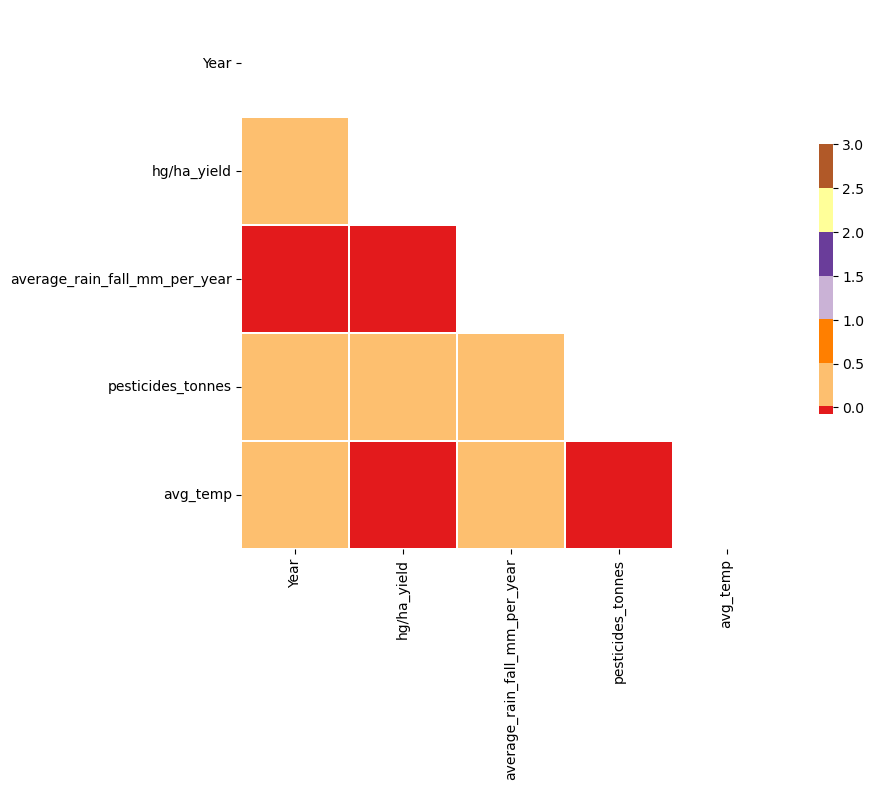

In [47]:
correlation_data = yield_df.select_dtypes(include=[np.number]).corr()
mask = np.zeros_like(correlation_data)
mask[np.triu_indices_from(mask)] =True
f,ax = plt.subplots(figsize=(10,7))
cmap = sns.palette="Paired"
sns.heatmap(correlation_data, mask=mask,cmap =cmap, vmax=3,center =0, 
            square=True,linewidths =0.3,cbar_kws ={"shrink":0.5})                                                                     

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">It can be seen from the above correlation map that there is 0 and 0.5 means no correlation between any of the colmuns in the dataframe.</h1>

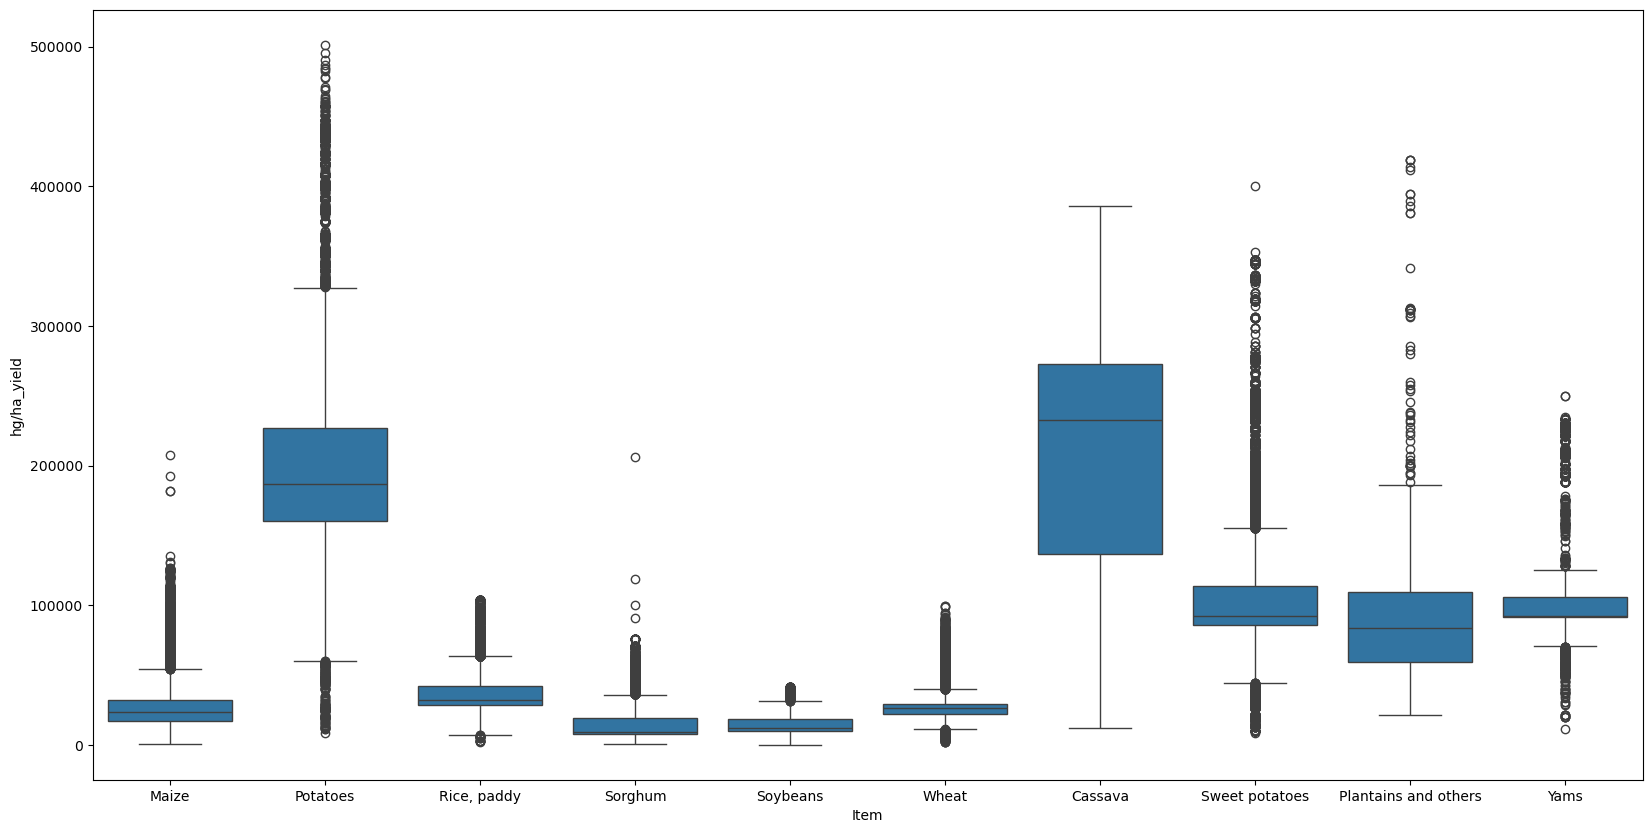

In [163]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x="Item",y="hg/ha_yield",data=yield_df,ax=ax);

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Data Preprocessing</h1>

In [48]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [50]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [51]:
features = features.drop(['Year'], axis=1)

In [52]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186094 entries, 0 to 186093
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: bool(111), float64(3)
memory usage: 24.0 MB


In [53]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Scaling Features:</h1>

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [55]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Training Data

In [62]:
x_train,x_test,y_train,y_test = train_test_split(features, label, random_state=42, test_size=0.2)

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
DECISION TREE REGRESSION MODELLING</h1>

In [65]:
dt = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, 
                          min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                          max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                          ccp_alpha=0.0, monotonic_cst=None)

In [67]:
model = dt.fit(x_train,y_train)

In [68]:
y_pred= model.predict(x_test)

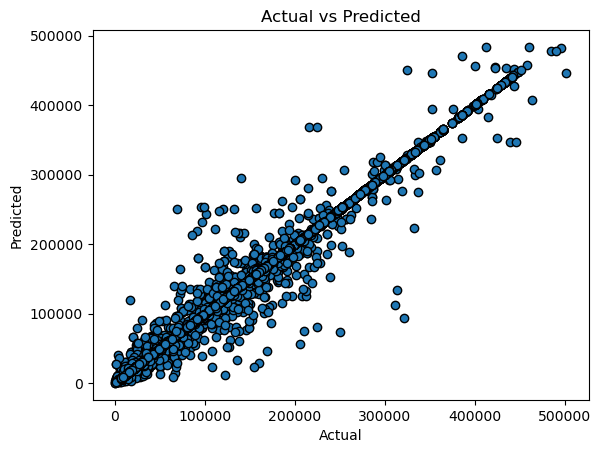

In [69]:
fig, ax = plt.subplots() 
ax.scatter(y_test, y_pred,edgecolors=(0, 0, 0))
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

# Model Results & Conclusions

In [97]:
varimp= {'imp':model.feature_importances_,'names':yield_df_onehot.columns[yield_df_onehot.columns!="hg/ha_yield"]}

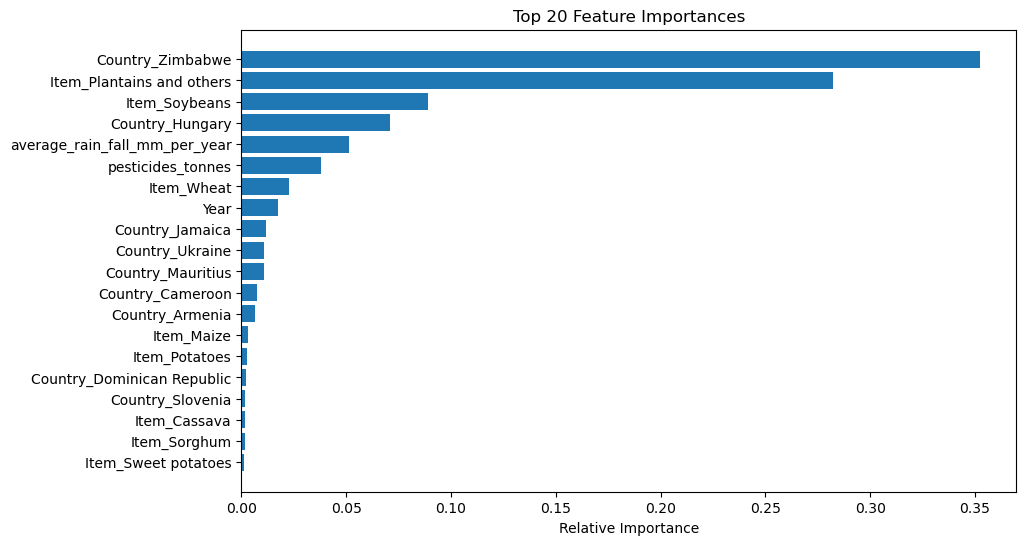

In [164]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_nam = yield_df_onehot.columns[yield_df_onehot.columns != "hg/ha_yield"]

# Sort indices by importance descending
indices_desc = np.argsort(importances)[::-1]

# Select top 10 features (adjust N as needed)
top_n = 20
top_indices = indices_desc[:top_n]

plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances")
plt.barh(range(top_n), importances[top_indices][::-1], align='center')  # reverse for top-down
plt.yticks(range(top_n), [feature_nam[i] for i in top_indices][::-1])
plt.xlabel("Relative Importance")
plt.show()


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
ACCURACY</h1>

In [166]:
print(r2_score(y_test,y_pred))

0.9953464946213786


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
CONCULSION : WE GOT ACCURACY OF 0.99 FOR THE MODEL THE IMPORTANT FEATURES VISIUALISED IN THE TOP. COUNTRY ZIMBABWE, ITEM PLANTAINS AND OTHER 
ARE CONTRIBUTING MORE IN PREDICTION PART.</h1>